In [1]:
#1) 라이브러리 설치
#!pip install soundfile
#!pip install librosa  # : librosa는 음악과 오디오를 처리하고 분석하는 Python 패키지


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#2) 파일다운로드 재저장
import requests

url = 'http://www.nch.com.au/acm/8k16bitpcm.wav'
r = requests.get(url)

with open('/content/drive/MyDrive/저녁GPT/day06/test_file.wav', 'wb') as f:
    f.write(r.content)

In [4]:
#3) 음성확인
import IPython.display
import librosa
y, sr = librosa.load('/content/drive/MyDrive/저녁GPT/day06/test_file.wav', sr=None)
IPython.display.Audio(data=y, rate=sr)

In [5]:
#4) librosa.load -> librosa.effects.hpss -> librosa.stft(percussive)-> librosa.istft(D_denoised) -> 길이 맞추기 -> 병합 -> 저장
import numpy as np
import librosa
import soundfile as sf

#filename = librosa.example('nutcracker')
filename = '/content/drive/MyDrive/저녁GPT/day06/test_file.wav'
# 4-1. 오디오 파일 로드 (로컬 파일을 사용)
audio_data, sr = librosa.load(filename, sr=None)


# 4-2. HPSS 적용하여 목소리와 배경 분리
harmonic, percussive = librosa.effects.hpss(audio_data)

# 4-3. 배경 소리에 FFT 적용하여 잡음 제거, FFT를 수행
D = librosa.stft(percussive)

# 4-4스펙트럼에서 잡음을 제거
D_denoised = np.where(np.abs(D) > 0.01, D, 0)

#4-5 역 FFT를 수행
percussive_denoised = librosa.istft(D_denoised)

# 4-6. 잡음이 제거된 배경과 원래 목소리를 병합
# 길이 확인
len_harmonic = len(harmonic)
len_percussive_denoised = len(percussive_denoised)

#4-7 길이를 맞춰주기
if len_harmonic > len_percussive_denoised:
    percussive_denoised = np.pad(percussive_denoised, (0, len_harmonic - len_percussive_denoised))
else:
    harmonic = np.pad(harmonic, (0, len_percussive_denoised - len_harmonic))

#4-8 잡음이 제거된 배경과 원래 목소리를 병합
audio_denoised = harmonic + percussive_denoised

# 결과 저장
sf.write('/content/drive/MyDrive/저녁GPT/day06/audio_denoised.wav', audio_denoised, sr)


In [6]:
#5) 각각 오디오로 확인

from IPython.display import display, Audio
import numpy as np
import matplotlib.pyplot as plt

print("Original Audio:")
display(Audio(data=audio_data, rate=sr))

print("Harmonic Component:")
display(Audio(data=harmonic, rate=sr))

print("Denoised Audio:")
display(Audio(data=audio_denoised, rate=sr))

Original Audio:


Harmonic Component:


Denoised Audio:


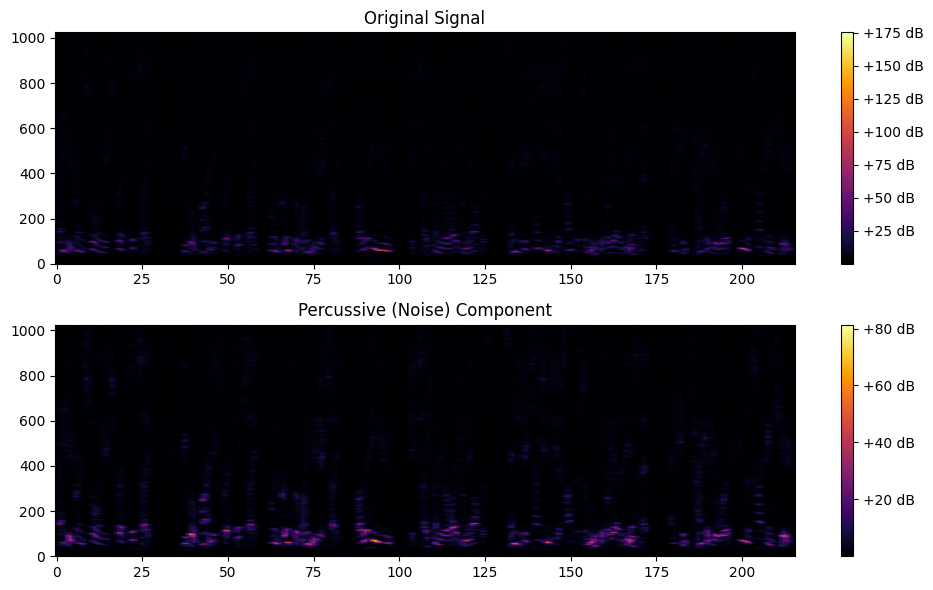

In [7]:
#6)스펙트롬 비교
X_spectrogram = np.abs(librosa.stft(audio_data))
P_spectrogram = np.abs(librosa.stft(percussive))


spectrograms = [X_spectrogram, P_spectrogram]
titles = ['Original Signal', 'Percussive (Noise) Component']

plt.figure(figsize=(10, 6))
for i, (s, t) in enumerate(zip(spectrograms, titles)):
    plt.subplot(2, 1, i+1)
    plt.imshow(s, aspect='auto', cmap='inferno', origin='lower')
    plt.title(t)
    plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()

In [8]:
#7) 목소리에 노이즈를 강하게 넣어 보자.
filename = '/content/drive/MyDrive/저녁GPT/day06/test_file.wav'
audio_data, sr = librosa.load(filename, sr=None)

harmonic, percussive = librosa.effects.hpss(audio_data)

noise_amp = 0.5  # Strong noise amplitude
noise = noise_amp * np.random.normal(size=harmonic.shape)
harmonic_noisy = harmonic + noise

audio_noisy = harmonic_noisy + percussive

print("Original Audio:")
display(Audio(data=audio_data, rate=sr))

print("Audio with Strong Noise in Harmonic Component:")
display(Audio(data=audio_noisy, rate=sr))

Original Audio:


Audio with Strong Noise in Harmonic Component:


In [9]:
#8)filename = '/content/drive/MyDrive/저녁GPT/day06/test_file.wav' 의 파일의 목소리에 작은별mp3의 배경을 결합 해보자.
import librosa

voice_filename = '/content/drive/MyDrive/저녁GPT/day06/test_file.wav'
music_filename = '/content/drive/MyDrive/저녁GPT/day06/작은별.mp3'

voice_data, sr_voice = librosa.load(voice_filename, sr=None)
music_data, sr_music = librosa.load(music_filename, sr=None)

if sr_voice != sr_music:
    music_data = librosa.resample(music_data, orig_sr=sr_music, target_sr=sr_voice)

if len(voice_data) > len(music_data):
    voice_data = voice_data[:len(music_data)]
else:
    music_data = music_data[:len(voice_data)]

combined_audio = voice_data + music_data

sf.write('/content/drive/MyDrive/저녁GPT/day06/combined_audio.wav', combined_audio, sr_voice)

print("Combined Audio:")
display(Audio(data=combined_audio, rate=sr_voice))


Combined Audio:


In [10]:
#9) 배경 소리를 줄이고 싶어
# Load your voice file and the background music
voice_filename = '/content/drive/MyDrive/저녁GPT/day06/test_file.wav'
music_filename = '/content/drive/MyDrive/저녁GPT/day06/작은별.mp3'

voice_data, sr_voice = librosa.load(voice_filename, sr=None)
music_data, sr_music = librosa.load(music_filename, sr=None)

music_data= 0.2* music_data

if sr_voice != sr_music:
    music_data = librosa.resample(music_data, orig_sr=sr_music, target_sr=sr_voice)

if len(voice_data) > len(music_data):
    voice_data = voice_data[:len(music_data)]
else:
    music_data = music_data[:len(voice_data)]


combined_audio = voice_data + music_data

print("Combined Audio:")
display(Audio(data=combined_audio, rate=sr_voice))


Combined Audio:


In [11]:
#10) 각 데시벨을 확인해줘
import numpy as np

def calculate_decibel(audio_signal):
    rms = np.sqrt(np.mean(np.square(audio_signal)))
    decibel = 20 * np.log10(rms)
    return decibel

decibel_voice = calculate_decibel(voice_data)
decibel_music = calculate_decibel(music_data)
decibel_combined = calculate_decibel(combined_audio)

decibel_voice, decibel_music, decibel_combined

(-15.39493203163147, -32.43335723876953, -15.312232971191406)